**Table of contents**<a id='toc0_'></a>    
- 1. [environment notes](#toc1_)    
- 2. [global params](#toc2_)    
  - 2.1. [axis parameter directory](#toc2_1_)    
- 3. [example data](#toc3_)    
  - 3.1. [discrete](#toc3_1_)    
  - 3.2. [Grouped bars (exemplar)](#toc3_2_)    
  - 3.3. [Testing global params on new plot](#toc3_3_)    
- 4. [datasets](#toc4_)    
- 5. [faceting](#toc5_)    
- 6. [cGPT-generated template (from layout & requirements)](#toc6_)    
- 7. [distributions](#toc7_)    
  - 7.1. [histogram w/ kernel fit & errorbars](#toc7_1_)    
  - 7.2. [filled histograms](#toc7_2_)    
  - 7.3. [grouped boxplots](#toc7_3_)    
- 8. [relationships/trends](#toc8_)    
  - 8.1. [contour plot](#toc8_1_)    
  - 8.2. [scatter w/ LOBF & continuous errorbars](#toc8_2_)    
  - 8.3. [scatter w/ marginal densities](#toc8_3_)    
  - 8.4. [pairplot](#toc8_4_)    
  - 8.5. [correlation matrix](#toc8_5_)    
- 9. [classification/clustering](#toc9_)    
  - 9.1. [2D scatter w/ fitted nonlinear multi-class decision boundary & filled regions](#toc9_1_)    
  - 9.2. [beautified version using sklearn & sk-data-generators](#toc9_2_)    
  - 9.3. [3D scatter w/ fitted nonlinear multi-class decision surface](#toc9_3_)    
  - 9.4. [2D scatter w/ fitted centroids and graded filled densities](#toc9_4_)    
- 10. [math](#toc10_)    
  - 10.1. [2D function](#toc10_1_)    
  - 10.2. [3D surface](#toc10_2_)    
  - 10.3. [3D curve](#toc10_3_)    
  - 10.4. [2D vector field](#toc10_4_)    
  - 10.5. [2D contour](#toc10_5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[environment notes](#toc0_)

**Conda environment**

- `conda activate DL-testenv`

**Git repo**

- []

---

**Exporting notebook**

1. In Python/zsh terminal: activate conda base environment \
   `conda activate base`
2. Execute nbconvert conversion to html in classic format \
   `jupyter nbconvert --to html --execute plotting_temp.ipynb --template classic`
3. View output in notebook directory

---

**Git workflow fundamentals** [TODO]: move this section to DS_temp only

(1) Navigate in zsh terminal to desired dir of local repo

(2) Establishing repo

- (a) From existing remote repo \
   `git clone <remote_repo_HTTP> <local_destination_dir_name>`

- (b) Starting anew (initialize local > create corresponding remote > connect) \
  `git init <local_destination_dir_name>` \
  [`create remote repo` corresponding to local on github/gitlab/bitbucket] \
  `git remote add origin <remote_repo_HTTP>` (must be in local repo dir) \
  [`push initial commit` to remote repo to establish connection (see (4) and (5))]

(3) Starting/switching to working branch for task

- (a) Starting fresh \
  `git branch <branch_name>`

- (b) Switching to existing branch \
  `git checkout <branch_name>` \
  (create and switch altogether: `git checkout -b <branch_name>`)

(4) Track changes (git equivalent of `cmd+S`)

- add local changes to stage & save snapshot \
  `git add .` \
  `git commit -m <commit_message>`

(5) Push changes to remote repo (git remote equivalent of `cmd+S`)

- push local commits upstream to remote branch for the first time \
  `git push --set-upstream origin <branch_name>` (--u equiv opt; must be in local repo dir)
- henceforth until pulling/merging \
  `git push`
- (alternative w/o setting upstream branch explicitly: \
  `git push <remote_repo_HTTP> <branch_name>`)

---

(6) Opening pull request remotely (on GitHub) & performing quality control (diff/reviewers/comments)

1. [On GitHub, *navigate to newly created branch* in repo]
2. [Select `Compare and pull request`. On this page, you can:
   1. Add reviewers for this branch & labels
   2. View all diff for all commits (bottom of page)]
3. [`Name` pull req for this branch + add any rel desc > select `Create pull request`. You can then:
   1. View 'Commits' tab (shows diff for each commit on this branch)
   2. View 'Files changed' tab (shows changes by file)
   3. View any additional commits on this branch, which will appear here for review
   4. (in either tab) Review diff window and add comments to any line for someone to review]

(7) Merging pushed changes w/ remote (for collaboration)

1. [On GitHub pull request page select appropriate option from `Rebase and merge`]
2. [(`Delete` remote working branch)] (optional)

(8) Starting new task on new working branch from existing local/remote repo

1. Return to main branch \
   `git checkout main`
1. (Delete local working branch) (optional) \
   `git branch -d <branch_name>`
2. Update local repo w/ new remote changes incl. those you merged from working branch \
   `git pull origin main`
3. Resume from (3)

---

(A) .gitignore file: list the following
1. A
   1. `archive` directory
   2. `version history` directory
   3. `share` directory
2. B
   1. personal task `notes` directory
   2. personal task `resources` directory
3. C
   1. large/private `library` directories
   2. large/private `data` directories

(B) Notes on best practices for collaboration: Implement the following:

- **Meaningful branch naming conventions**
  - e.g., indicate purpose w/ identifier/prefix "feature/", "bugfix/", "hotfix/"
- **Pull from main regularly** to stay up to date with the latest changes from the main branch
- **Feature/working branches based on main** by always starting in main, after pulling from main
- **Code review pipeline** to facilitate efficient & bug-free merging
- **Robust CI system** that runs automated tests whenever code changes are pushed to remote
- **Git hooks** like linters/tests to force quality control measures
- **Version Tagging** (e.g., `git tag -a`) to indicate milestones and version numbers of releases
- **Quality documentation & READMEs** in each repo documenting:
  - setup instructions, development guidelines, and other team instructions

# 2. <a id='toc2_'></a>[global params](#toc0_)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set global style adjustments
sns.set(style='whitegrid', font_scale = 1.2)
sns.set_context('notebook')  # Adjust the context for better visibility

# Set gridline lightness globally
sns.set_style({
    'axes.grid.color': 'lightgray',
    'axes.grid.alpha': .5
    })

# Set legend parameters
sns.set_style({'legend.frameon': False})
sns.set_palette(palette = "pastel", n_colors = 2, desat = 0.8)
sns.set_context(rc={
    'legend.title_fontsize': 12,
    'legend.labelspacing': 0.5,
    'legend.handletextpad': 0.2,
    'legend.frameon': False,
    })
# plt.rcParams['legend.loc'] = 'center left'
# plt.rcParams['legend.bbox_to_anchor'] = (1, 0.5)
# plt.rcParams['legend.align'] = 'left'


# Set despining globally
sns.set_style({
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.right': False,
    'axes.spines.top': False
    })

# Set tight layout globally
sns.set_context(rc = {'figure.autolayout': True})

# Set box removal globally
sns.set_style({'axes.box': False})

# Set global axis label font sizes
plt.rc('axes', labelsize = 12)

# Set global tick label font sizes
plt.rc('xtick', labelsize = 8)
plt.rc('ytick', labelsize = 8)

# Set figure size globally
plt.rcParams['figure.figsize'] = (6, 6)

# Set global font face
# plt.rcParams['font.family'] = 'Arial'

# Set figure title params globally
plt.rcParams['axes.titleweight'] = 'regular'
plt.rcParams['axes.titlepad'] = 20

# Other global axis params
plt.rcParams['axes.linewidth'] = 1.5
# plt.rcParams['xtick.major.width'] = 1.5
# plt.rcParams['ytick.major.width'] = 1.5

## 2.1. <a id='toc2_1_'></a>[axis parameter directory](#toc0_)

In [2]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',


# 3. <a id='toc3_'></a>[example data](#toc0_)

## 3.1. <a id='toc3_1_'></a>[discrete](#toc0_)

In [3]:
# Create dataframe for prevalence data
prevalence_data = pd.DataFrame({
    'age_group':
        ['40 to 59', '40 to 59',
         '60 to 69', '60 to 69',
         '70 to 79', '70 to 79'],
    'prevalence_percent': [38, 4, 75, 7, 93, 19],
    'hearing_status':
        ['clinical', 'perceived',
         'clinical', 'perceived',
         'clinical', 'perceived']
    })

## 3.2. <a id='toc3_2_'></a>[Grouped bars (exemplar)](#toc0_)

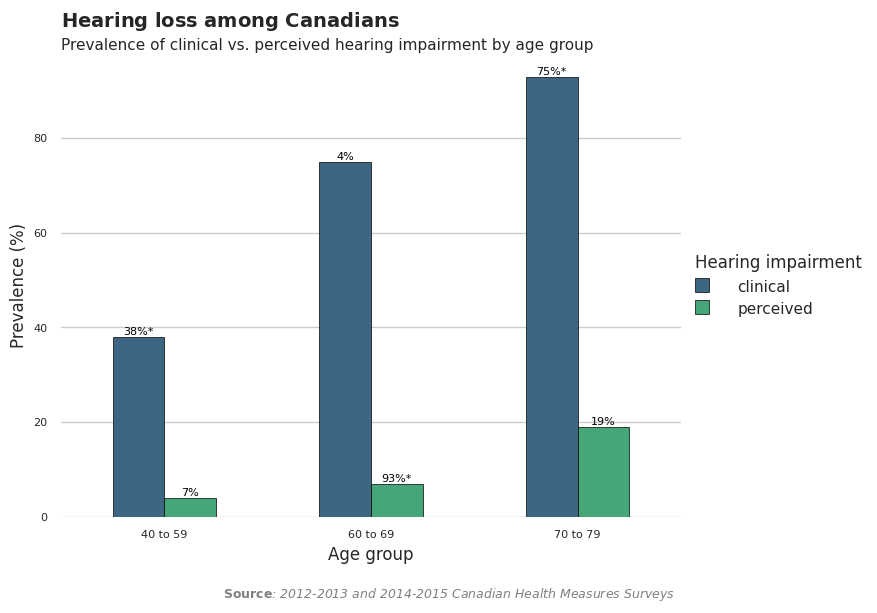

In [4]:
# TODO: set x/y/title labels, applicable position params, and axis tick label sizes globally
# Define custom color palette with adjusted lightness
custom_palette = sns.color_palette(palette="viridis", n_colors=2, desat=1)

# Plot
plt.figure(figsize=(8, 6))

ax = sns.barplot(
    data=prevalence_data,
    x='age_group',
    y='prevalence_percent',
    hue='hearing_status',
    edgecolor='black',      # Add thin black outline around bars
    linewidth=0.5,          # Adjust the width of the outline
    dodge=0.8,              # Adjust the spacing between the groups
    errorbar=None,          # Remove error bars
    width=0.5,              # Adjust the width of the bars within the groups
    palette=custom_palette,
    )

# Set labels and title
plt.title(
    r'$\bf{Hearing\ loss\ among\ Canadians}$',
    fontsize=14, loc='left', pad=20)
plt.text(
    0, 1.01,
    'Prevalence of clinical vs. perceived hearing impairment by age group',
    fontsize=11, transform=ax.transAxes, ha='left'
    )

plt.xlabel('Age group')
plt.ylabel('Prevalence (%)')

# Set smaller font size for axis numbers
ax.tick_params(axis='both', which='major', labelsize=8)

# Move the legend outside the figure on the right side and adjust legend item spacing
leg = plt.legend(
    title='Hearing impairment',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False
    )
leg._legend_box.align = "left"
# leg.set_bbox_to_anchor((1, 0.5))  # Adjust the spacing between legend items

# Add numbers over bars (centered)
bar_numbers = ["38%*", "4%", "75%*", "7%", "93%*", "19%"]
for p, label in zip(ax.patches, bar_numbers):
    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        color='black',
        size=8
    )

# Add caption (source information)
caption = r'$\bf{Source}$: 2012-2013 and 2014-2015 Canadian Health Measures Surveys'
plt.text(
    0.99, -0.15,
    caption,
    fontsize=9, color='#808080', ha='right', va='top', style='italic',
    transform=ax.transAxes
    )

# Adjust legend item boxes to be squares
for lh in leg.legend_handles:
    lh.set_height(10)
    lh.set_width(10)

plt.show()

# 4. <a id='toc4_'></a>[datasets](#toc0_)

In [5]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
uniform_data = np.random.rand(10, 12)
uniform_data

array([[5.16820798e-01, 5.08997102e-01, 9.74726812e-01, 3.61961677e-01,
        1.52244829e-01, 4.66220531e-01, 4.44990264e-01, 3.65334418e-01,
        2.63274196e-01, 3.77569927e-01, 5.86839242e-01, 3.05685635e-01],
       [7.15135069e-01, 2.03093169e-01, 7.31345865e-02, 7.05642735e-01,
        2.35769082e-01, 7.17932404e-01, 3.12306855e-01, 1.01530252e-01,
        5.37445868e-01, 4.47491899e-02, 7.78399760e-01, 4.94895262e-01],
       [2.71927412e-01, 3.15194540e-02, 9.00268750e-01, 6.29888730e-01,
        9.57562410e-01, 6.68736948e-01, 4.60292549e-01, 7.81666789e-01,
        2.15086215e-01, 2.74356806e-01, 4.75472834e-02, 2.69251770e-01],
       [3.19305902e-01, 2.09038318e-01, 7.09262804e-01, 7.80360644e-01,
        2.93204800e-01, 4.30495449e-01, 8.43240667e-01, 5.26548601e-01,
        5.42314005e-01, 8.12975886e-01, 6.69303603e-03, 8.28876394e-01],
       [8.97066100e-02, 5.23613815e-03, 8.65923391e-02, 6.78785374e-01,
        7.88594341e-01, 5.69929646e-01, 3.50541259e-01, 4.51

In [8]:
data = pd.DataFrame(
    {'x':np.arange(1,101),
     'y':np.random.normal(0,4,100)
     })
data.head()

,x,y
0,1,2.337619
1,2,1.483914
2,3,1.787400
3,4,-0.813448
4,5,2.377926


In [9]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 5. <a id='toc5_'></a>[faceting](#toc0_)

In [10]:
# The relevant subset of the data
titanic[['survived', 'sex', 'age']].head()

,survived,sex,age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0


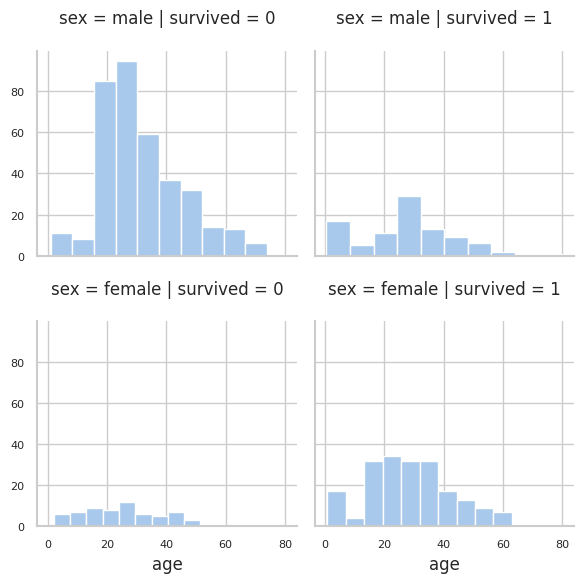

In [11]:
g = sns.FacetGrid(
    titanic,
    col="survived",
    row="sex"
    )
g = g.map(plt.hist, "age")

# 6. <a id='toc6_'></a>[cGPT-generated template (from layout & requirements)](#toc0_)

# 7. <a id='toc7_'></a>[distributions](#toc0_)

## 7.1. <a id='toc7_1_'></a>[histogram w/ kernel fit & errorbars](#toc0_)

In [12]:
# The relevant subset of the data
# x: continuous; (y (implied): frequency)
tips[['total_bill']].head()

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59


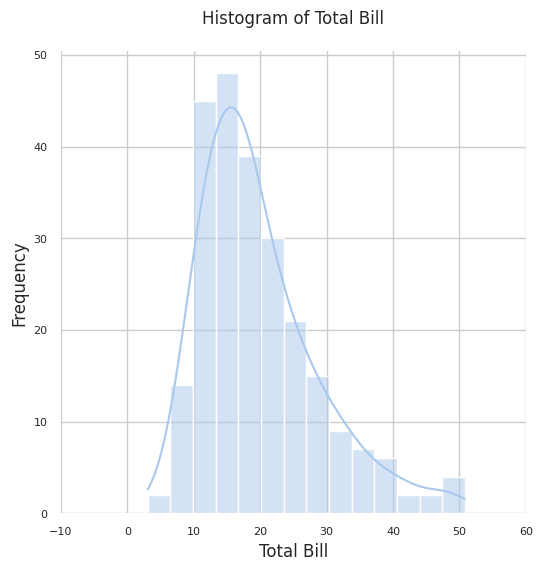

In [13]:
# Distributions
# Histogram with confidence interval bar
tips = sns.load_dataset('tips')
plt.figure()
sns.histplot(
    data=tips,
    x='total_bill',
    kde=True,
    # palette='pastel'
    )
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bill')
plt.xlim(-10, 60)
plt.show()

## 7.2. <a id='toc7_2_'></a>[filled histograms](#toc0_)

In [14]:
# The relevant subset of the data
# x: continuous; (y: frequency); hue: categorical
iris[['sepal_length', 'species']].head()

,sepal_length,species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa


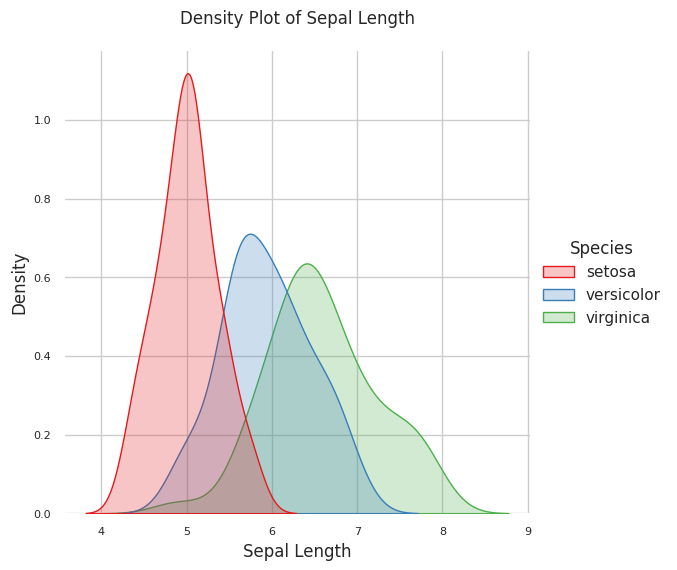

In [15]:
# Density plot
plt.figure()
ax = sns.kdeplot(
    data=iris,
    x='sepal_length', hue='species',
    fill=True, common_norm=False, palette='Set1'
    )
plt.xlabel('Sepal Length')
plt.ylabel('Density')
plt.title('Density Plot of Sepal Length')
handles, labels = ax.get_legend_handles_labels()
# plt.legend(
#     handles=handles,
#     labels=labels,
#     title='Species',
#     loc='upper right',
#     frameon=False
#     )
sns.move_legend(
    ax,
    loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon=False,
    title="Species",
    )
# plt.xlim(0, 8)
# plt.ylim(0, 1.2)
plt.show()

## 7.3. <a id='toc7_3_'></a>[grouped boxplots](#toc0_)

In [16]:
# The relevant subset of the data
# x: categorical (ordinal; groups), y: continuous, hue: categorical
tips[['day', 'total_bill', 'sex']].head()

,day,total_bill,sex
0,Sun,16.99,Female
1,Sun,10.34,Male
2,Sun,21.01,Male
3,Sun,23.68,Male
4,Sun,24.59,Female


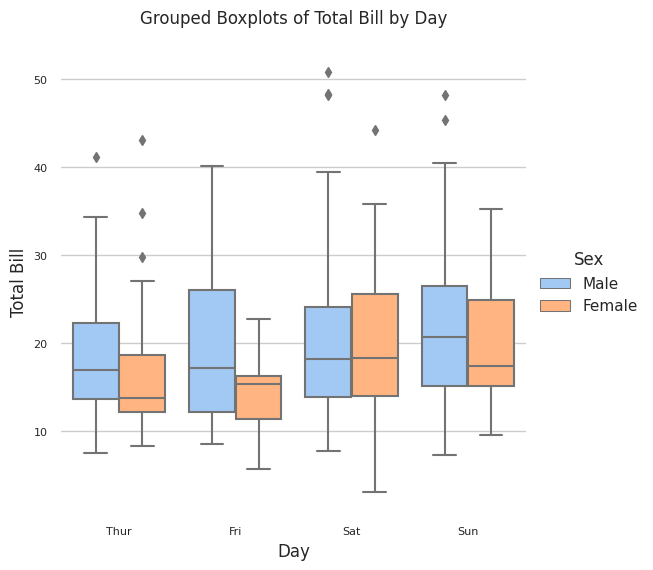

In [17]:
# Grouped boxplots
plt.figure()
sns.boxplot(
    data=tips,
    x='day',
    y='total_bill',
    hue='sex',
    palette='pastel',
    saturation=1,
    # whis=.1,
    )
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.title('Grouped Boxplots of Total Bill by Day')
plt.legend(
    title='Sex',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False
    )
# plt.xlim(-10, 60)
plt.show()

# 8. <a id='toc8_'></a>[relationships/trends](#toc0_)

In [18]:
# The relevant subset of the data
# x: continuous; y: continuous
iris[['sepal_length', 'sepal_width']].head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


## 8.1. <a id='toc8_1_'></a>[contour plot](#toc0_)

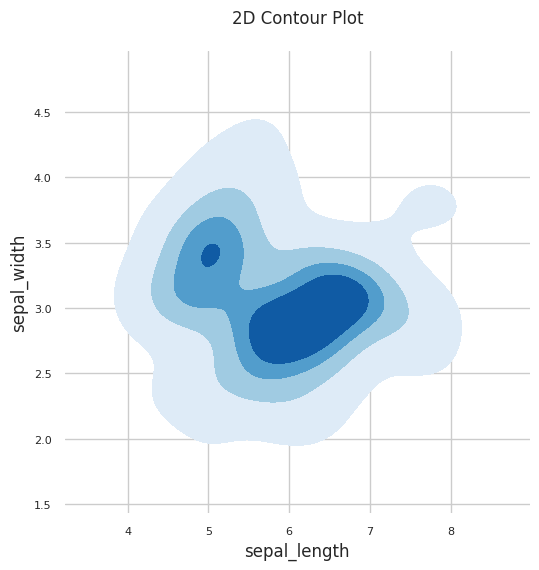

In [19]:
from scipy.stats import kde
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.manifold import MDS

# 2D Contour Plot
plt.figure(figsize=(6, 6))
iris = sns.load_dataset('iris')
sns.kdeplot(
    data=iris,
    x='sepal_length', y='sepal_width',
    cmap='Blues', fill=True, levels=5
    )
plt.title('2D Contour Plot')
plt.show()


## 8.2. <a id='toc8_2_'></a>[scatter w/ LOBF & continuous errorbars](#toc0_)

In [20]:
# The relevant subset of the data
# x: continuous; y: continuous
tips[['total_bill', 'tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


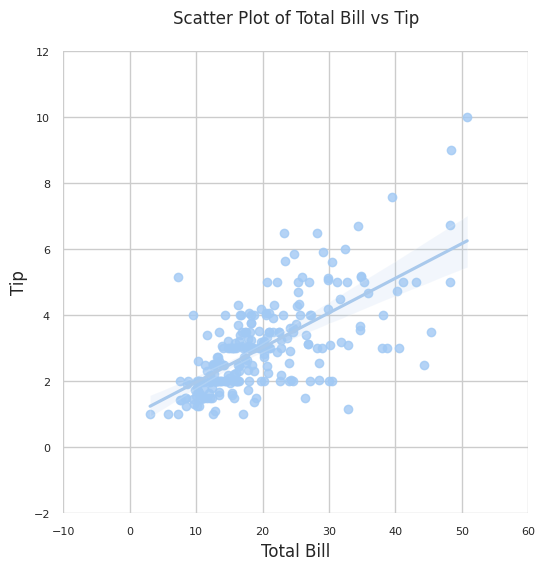

In [21]:
# Regression/Time Series
# Scatter plot with line of best fit and confidence interval bar
plt.figure()
sns.regplot(
    data=tips,
    x='total_bill', y='tip',
    scatter_kws={
        'color': sns.color_palette('pastel')[0],
        },
    )
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlim(-10, 60)
plt.ylim(-2, 12)
plt.show()

## 8.3. <a id='toc8_3_'></a>[scatter w/ marginal densities](#toc0_)

In [22]:
# The relevant subset of the data
# x: continuous; y: continuous; (y2 (implied): frequency)
tips[['total_bill', 'tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


<Figure size 600x600 with 0 Axes>

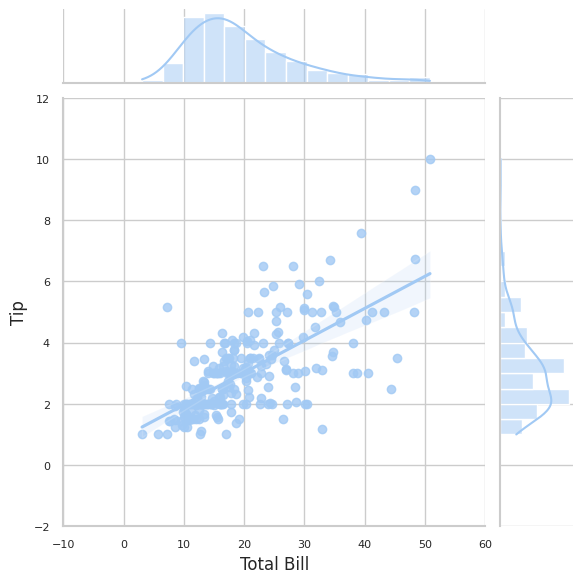

In [23]:
# Scatter plot with marginal densities
plt.figure()
sns.jointplot(
    data=tips,
    x='total_bill',
    y='tip',
    kind='reg',
    color=sns.color_palette('pastel')[0]
    )
plt.xlabel('Total Bill')
plt.ylabel('Tip')
# plt.title('Scatter Plot with Marginal Densities')
plt.xlim(-10, 60)
plt.ylim(-2, 12)
plt.show()

## 8.4. <a id='toc8_4_'></a>[pairplot](#toc0_)

In [24]:
# The relevant subset of the data
# (x (implied): all continuous; y (implied): all continuous); hue: categorical
pd.concat(
    objs=[iris._get_numeric_data(), iris['species']],
    axis=1,
    ).head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Figure size 600x600 with 0 Axes>

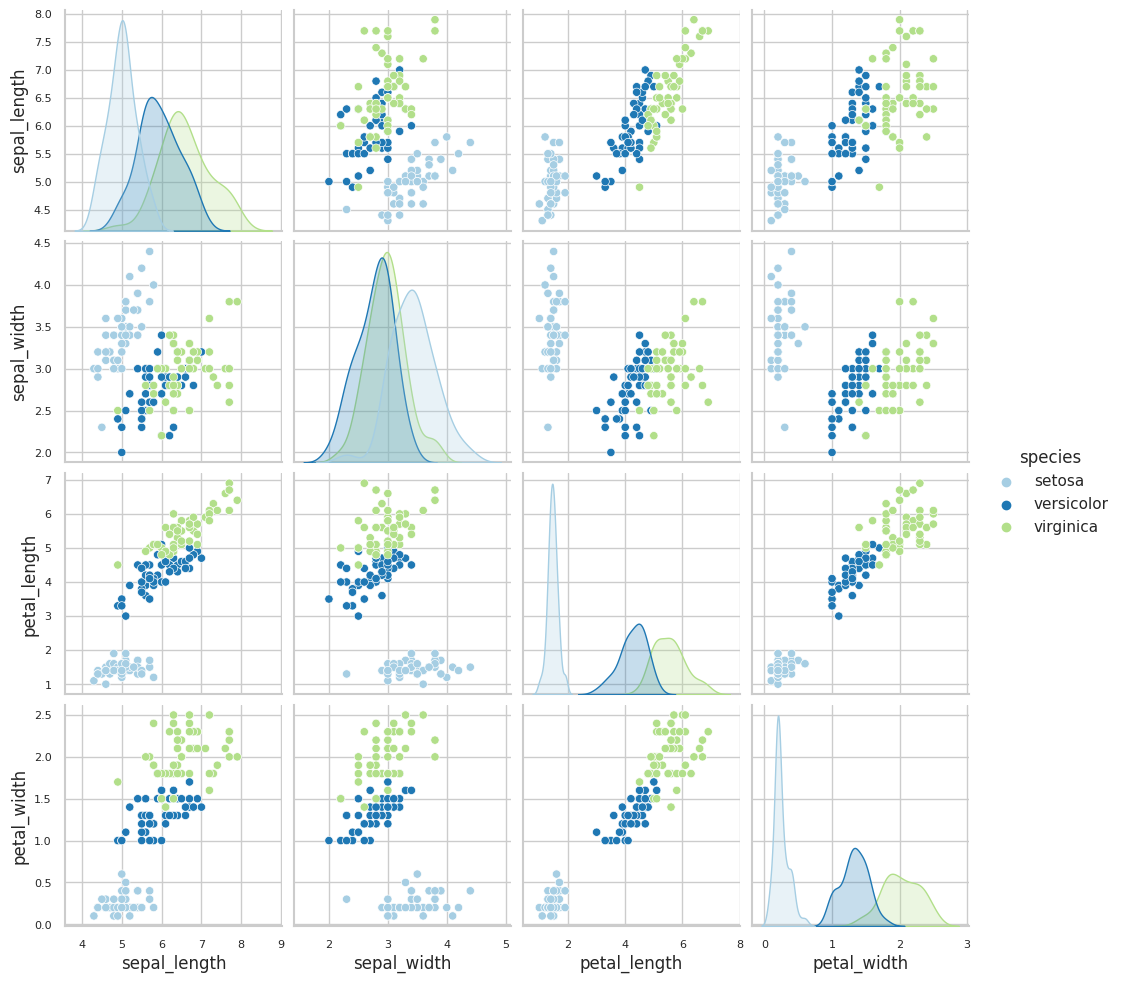

In [25]:
# Correlation Plot
plt.figure(figsize=(6, 6))
iris = sns.load_dataset('iris')
sns.pairplot(
    data=iris,
    hue='species',
    palette='Paired',
    )

## 8.5. <a id='toc8_5_'></a>[correlation matrix](#toc0_)

In [26]:
# The relevant subset of the data
# (x (implied): all continuous; y (implied): all continuous)
iris._get_numeric_data().head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


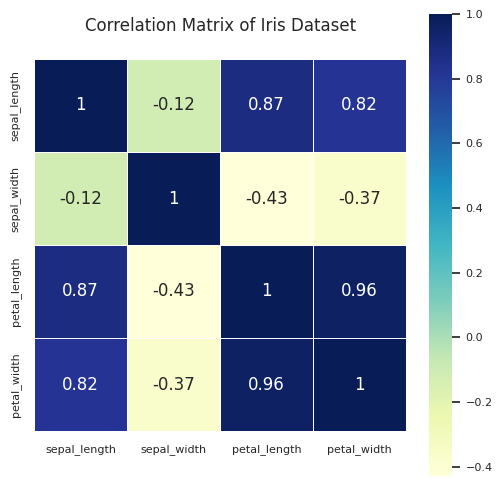

In [27]:
# Correlation matrix and heatmap
iris = sns.load_dataset('iris')
plt.figure()
correlation_matrix = iris.corr(numeric_only=True)
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='YlGnBu',
    cbar=True,
    square=True,
    linewidths=0.5)
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

# 9. <a id='toc9_'></a>[classification/clustering](#toc0_)

## 9.1. <a id='toc9_1_'></a>[2D scatter w/ fitted nonlinear multi-class decision boundary & filled regions](#toc0_)

In [28]:
# Data breakdown
# types and null counts
iris.info(show_counts=True)

# categorical unique values & counts
iris.select_dtypes(exclude=["number"]).value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


species   
setosa        50
versicolor    50
virginica     50
dtype: int64

In [29]:
# Data breakdown: Numeric (and categorical/object) descriptives
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [30]:
# The relevant subset of the data
# x: continuous; y: continuous; hue: categorical
iris[['sepal_length', 'sepal_width', 'species']].head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


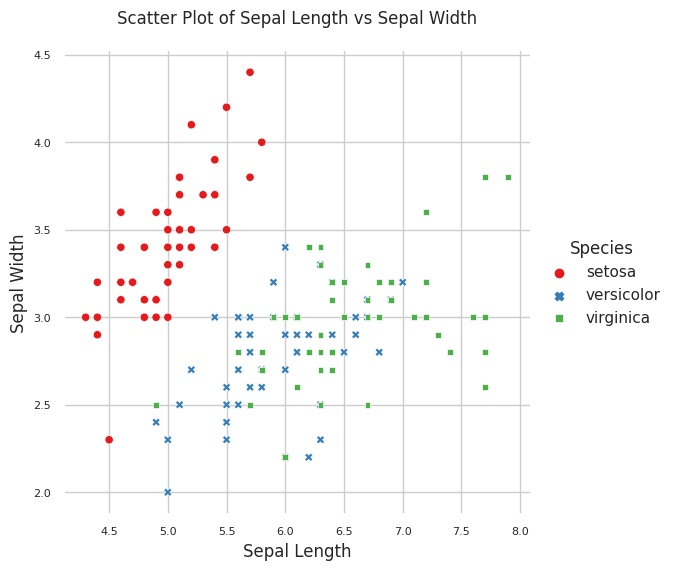

In [31]:
# Class/Cluster
# Scatter plot with decision boundaries and colors
sns.set_palette('Set1')
iris = sns.load_dataset('iris')
plt.figure()
scatter = sns.scatterplot(
    data=iris,
    x='sepal_length', y='sepal_width', hue='species',
    style='species', palette='Set1'
    )
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.legend(
    title='Species',
    loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon=False,
    )
# plt.xlim(0, 8)
# plt.ylim(0, 4.5)
plt.show()

## 9.2. <a id='toc9_2_'></a>[beautified version using sklearn & sk-data-generators](#toc0_)

In [32]:
# Data prep
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Make data for classifier with nonlinear decision boundary
plt.figure()
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1
    )
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Figure size 600x600 with 0 Axes>

In [33]:
# The data: inspection & descriptives
X.shape, X.dtype, y.shape, y.dtype

((500, 2), dtype('float64'), (500,), dtype('int64'))

In [34]:
# The data
# x: 500 continuous obs*2 feat; y: 500 binary labels
X[0:5,:], y[0:5]

(array([[-1.88336312,  0.26371203],
        [ 0.82373588, -1.17829196],
        [-0.80794937, -1.58454853],
        [ 0.79305   , -1.54690374],
        [ 0.49163657, -1.56687275]]),
 array([0, 1, 1, 1, 1]))

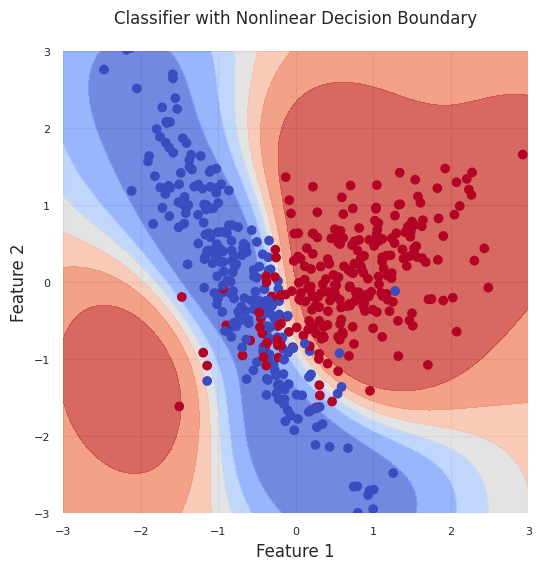

In [35]:
# Classifier with nonlinear decision boundary
svm = SVC(
    kernel='rbf',
    random_state=42,
    probability=True
    )
svm.fit(X_scaled, y)
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = svm.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot scatter w/ decision boundary
plt.contourf(
    xx, yy, Z,
    cmap='coolwarm', alpha=0.8
    )
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classifier with Nonlinear Decision Boundary')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

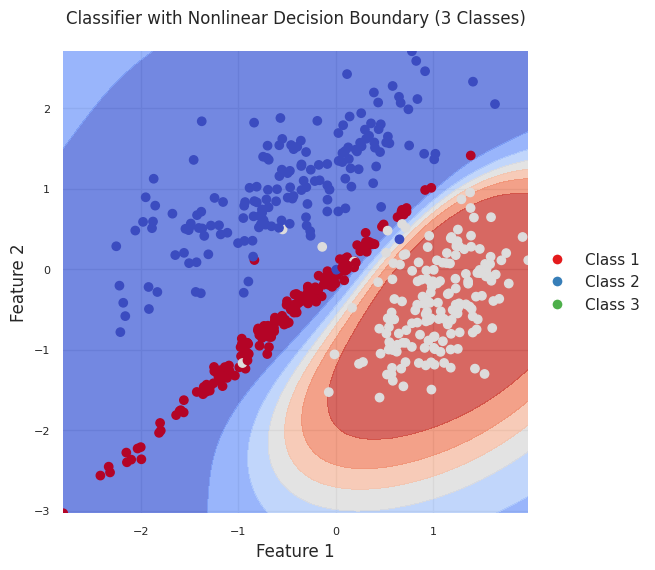

In [36]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Data loading & prep
plt.figure()
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=3
    )
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Classifier with nonlinear decision boundary
svm = SVC(
    kernel='rbf',
    random_state=42,
    probability=True
    )
svm.fit(X_scaled, y)
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100), np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 100))
Z = svm.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# Plot scatter w/ decision boundary
plt.contourf(
    xx, yy, Z,
    cmap='coolwarm', alpha=0.8
    )
scatter = plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=y, cmap='coolwarm'
    )

# Create legend with colored class markers
classes = np.unique(y)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w',
    markerfacecolor=sns.color_palette()[c],
    markersize=8,
    label=f'Class {c+1}'
    ) for c in classes
    ]
plt.legend(
    handles=legend_elements,
    loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon=False,
    # title="Species",
    )

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classifier with Nonlinear Decision Boundary (3 Classes)')
plt.xlim(X_scaled[:, 0].min(), X_scaled[:, 0].max())
plt.ylim(X_scaled[:, 1].min(), X_scaled[:, 1].max())
plt.show()

## 9.3. <a id='toc9_3_'></a>[3D scatter w/ fitted nonlinear multi-class decision surface](#toc0_)

In [37]:
# The relevant subset of the data
# x: continuous; y: continuous; z: continuous; hue: continuous
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


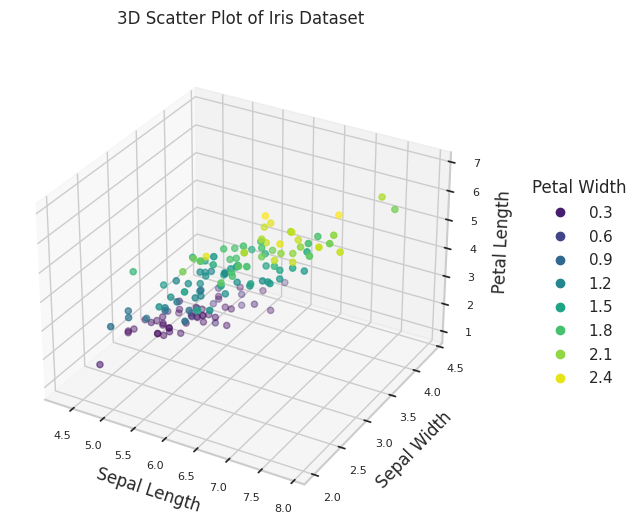

In [38]:
# Manifold
# 3D scatter plot with manifold
from mpl_toolkits.mplot3d import Axes3D

plt.figure()
ax = plt.axes(projection='3d')
sns.set_palette('dark')
scatter = ax.scatter(
    iris['sepal_length'], iris['sepal_width'], iris['petal_length'],
    c=iris['petal_width'], cmap='viridis'
    )
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter Plot of Iris Dataset')
legend = ax.legend(
    *scatter.legend_elements(),
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    ncol=1, frameon=False,
    title='Petal Width',
    )
# ax.add_artist(legend)
plt.show()

## 9.4. <a id='toc9_4_'></a>[2D scatter w/ fitted centroids and graded filled densities](#toc0_)

In [39]:
# Data prep
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

plt.figure()
X, y = make_blobs(
    n_samples=300,
    centers=3,
    random_state=42,
    cluster_std=1.0
    )
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Figure size 600x600 with 0 Axes>

In [40]:
# The data: inspection & descriptives
X.shape, X.dtype, y.shape, y.dtype

((300, 2), dtype('float64'), (300,), dtype('int64'))

In [41]:
# The data
# x: 300 continuous obs*2 feat; y: 300 integer labels 0,1,2
X[0:5,:], y[0:5]

(array([[-7.33898809, -7.72995396],
        [-7.74004056, -7.26466514],
        [-1.68665271,  7.79344248],
        [ 4.42219763,  3.07194654],
        [-8.91775173, -7.8881959 ]]),
 array([2, 2, 0, 1, 2]))

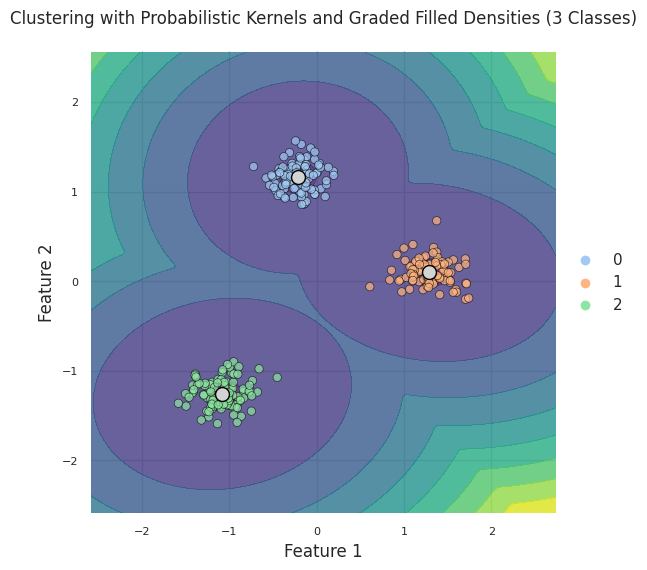

In [42]:
# Clustering with probabilistic kernels and graded filled densities 3 classes
gmm = GaussianMixture(
    n_components=3,
    random_state=42)
gmm.fit(X_scaled)

h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
    )
Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(
    xx, yy, Z,
    alpha=0.8, cmap='viridis'
    )
scatter = sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y,
    palette='pastel', edgecolor='black', alpha=0.7
    )
plt.scatter(
    gmm.means_[:, 0], gmm.means_[:, 1],
    color='lightgray', marker='o', s=100, edgecolor='black'
    )
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(
    'Clustering with Probabilistic Kernels and Graded Filled Densities (3 Classes)'
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles, labels,
    loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon=False,
    # title="Species",
    )
plt.show()

# 10. <a id='toc10_'></a>[math](#toc0_)

## 10.1. <a id='toc10_1_'></a>[2D function](#toc0_)

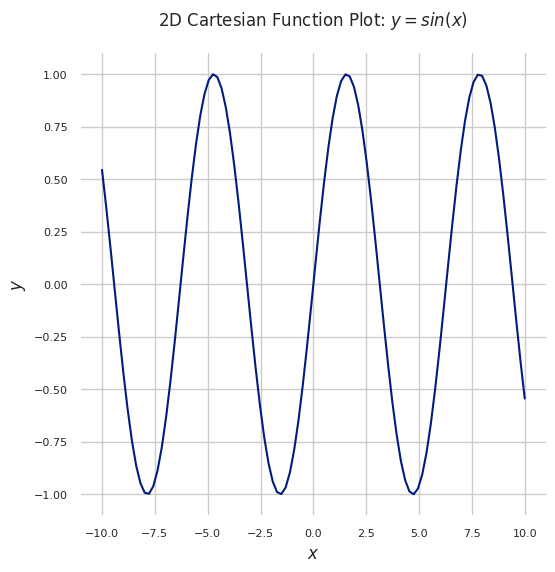

In [43]:
# 2D Cartesian function plot
plt.figure()
x = np.linspace(-10, 10, 100)
y = np.sin(x)

plt.plot(x, y)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('2D Cartesian Function Plot: $y = sin(x)$')
# plt.xlim(-10, 10)
# plt.ylim(-1.2, 1.2)
plt.show()

## 10.2. <a id='toc10_2_'></a>[3D surface](#toc0_)

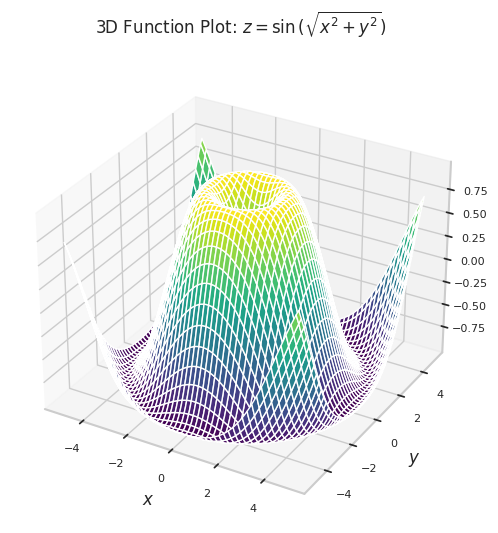

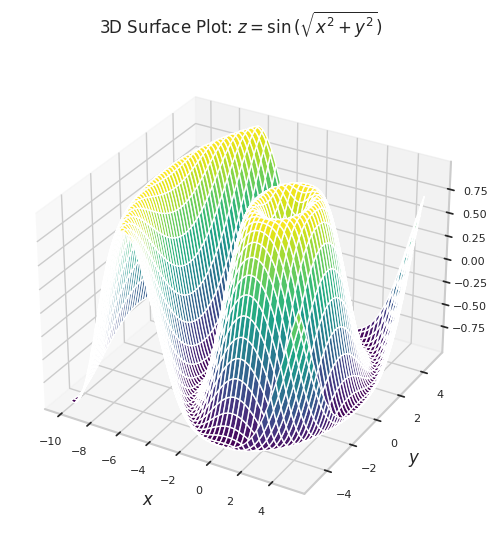

In [44]:
# 3D Function plot
plt.figure()
ax = plt.axes(projection='3d')
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

ax.plot_surface(
    X, Y, Z,
    cmap='viridis'
    )

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.title('3D Function Plot: $z = \sin{(\sqrt{x^2 + y^2})}$')
plt.show()

# 3D Surface plot
plt.figure()
ax = plt.axes(projection='3d')
x = np.linspace(-10, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

ax.plot_surface(
    X, Y, Z,
    cmap='viridis'
    )

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.title(
    '3D Surface Plot: $z = \sin{(\sqrt{x^2 + y^2})}$'
    )
plt.show()

## 10.3. <a id='toc10_3_'></a>[3D curve](#toc0_)

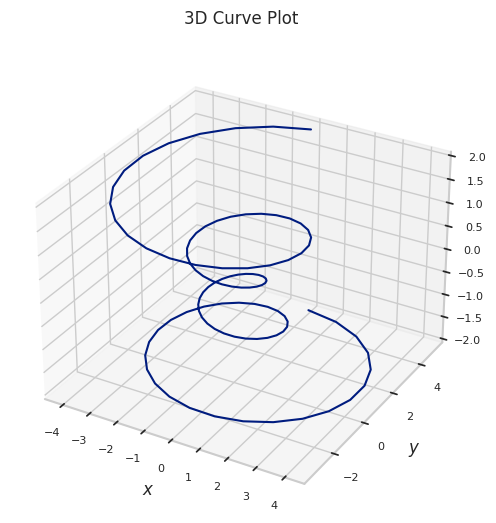

In [45]:
# 3D Curve plot
plt.figure()
ax = plt.axes(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.title('3D Curve Plot')
plt.show()

## 10.4. <a id='toc10_4_'></a>[2D vector field](#toc0_)

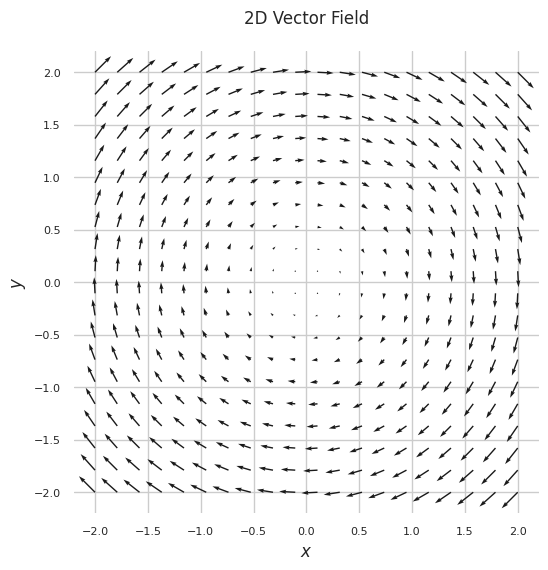

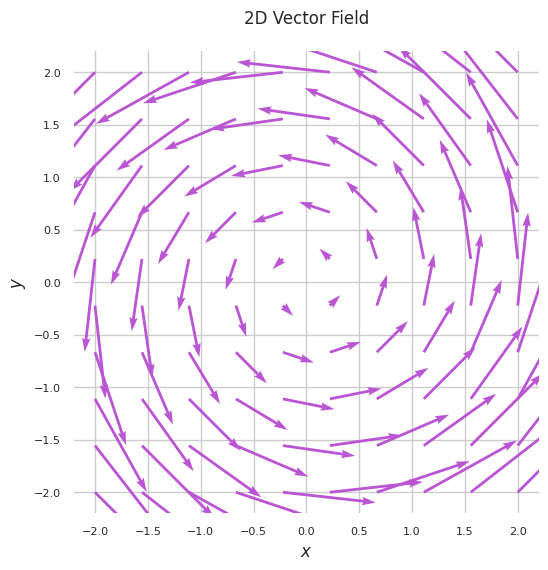

In [46]:
# 2D Vector Field
plt.figure()
X, Y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
U = Y
V = -X
plt.quiver(X, Y, U, V)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('2D Vector Field')
# plt.xlim(-2, 2)
# plt.ylim(-2, 2)
plt.show()

# 2D Vector Field
plt.figure(figsize=(6, 6))
x, y = np.linspace(-2, 2, 10), np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
U = -Y
V = X
plt.quiver(X, Y, U, V, scale=10, color='mediumorchid')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('2D Vector Field')
plt.show()

## 10.5. <a id='toc10_5_'></a>[2D contour](#toc0_)

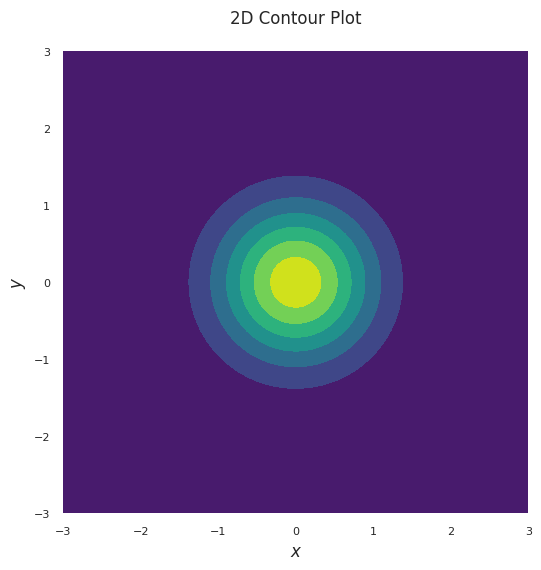

In [47]:
# 2D Contour
plt.figure()
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))

plt.contourf(
    X, Y, Z,
    cmap='viridis'
    )

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('2D Contour Plot')
# plt.xlim(-3, 3)
# plt.ylim(-3, 3)
plt.show()